<h1> <b>  Human Resource Analytics 
 </b> <br> </h1> ~ <b>Abhay Puri



<h1>1. The Human Resources Dataset  </h1>


The Human Resources Analytics is a simulated dataset from Kaggle and the focus is to understand why the best and most experienced employees is leaving the company. By the exploration of this dataset it is possible to extract good insights of a problems that the Human Resource department deals daily. In many industries retain their best employees its a question of long term strategy, and can impact the companies growth or put in financial risk, mainly if the employees leave to work at the competitor.



<h1>2. Exploratory Data Analysis (EDA) </h1>

Exploratory data analysis employs a variety of techniques (mostly statistical graphics) before making inferences from data. It is essencial to examine all variables in the dataset to:


<h1> 3. Preprossesing the dataset </h1>

Before starting the process, its important to answer if it's clear what kind of problem we are dealing with, because in many cases isn't so simple to identify it. A good understanding of the problem will help to choose the right data mining and machine learning techniques to make the right predictions. Thus, the first step, is preprocessing the data to look for missing, incomplete or noise values, because, in real word, the raw datas can be collect from many sources like sensors, websites, public data and many others.

To start the step of preprossing the dataset is neccessary to import some useful Python libraries.

    Numpy: Is a fundamental package to use linear algebra and random number capabilities. See: www.numpy.org/

    Pandas: Is a package to work with relacional data as tables. See: pandas.pydata.org/



In [1]:
%matplotlib inline

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

<b> Load the data </b> <br>
To load the dataset we use a Pandas method called read_csv that read CSV(comma-separated) files and covert into DataFrame.

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

Let's see the first 5 lines of the dataset. The <b> head </b> method list first N rows from the DataFrame and the method <b> tail </b>, returns the last N rows.

In [3]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Other useful method is <b> info </b> that shows a summary of the dataset, like number of observations, columns, variable type and the total memory usage. The dataset have 14999 observations, 10 columns and with no null values. The data types of the variables are divided in 2 float, 6 integer and 2 object.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.shape

(14999, 10)

<b> sample </b> is a easy way to get a few data quickly.

In [7]:
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
11576,0.97,0.51,5,215,7,0,0,0,management,high
909,0.92,0.90,5,248,5,0,1,0,sales,low
12851,0.85,0.66,4,155,4,0,0,0,hr,high
6735,0.25,0.59,4,166,5,0,0,0,sales,low
8864,0.81,0.56,3,142,3,0,0,0,sales,low
2799,0.89,0.79,4,133,2,0,0,0,support,medium
2503,0.61,0.99,4,251,2,0,0,0,IT,low
13959,0.99,0.60,4,209,8,1,0,0,IT,medium
3490,0.71,0.96,4,161,3,0,0,0,support,low
14179,0.80,0.80,4,146,3,1,0,0,IT,low


In [8]:
# now we have to change the sales to the department and the salary to the numerical values for the better results and better understanding.
data.rename(columns={'sales':'department'},inplace=True)

data['salary']=data['salary'].map({'low':1,'medium':2,'high':3})

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


<h1> 4. Descripitve Analysis </h1>
The descripitve Analysis is used to simplify and summarize the mainly characteristics of the dataset. In other words, show what kind of information the dataset has. The Pandas method describe generates a descriptive statistics that summarize the central tendency, dispersion and shape of the dataset. 

In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
#How many employees works in each department?
print(data['department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [12]:
#How many employees per salary range?
print(data['salary'].value_counts())

1    7316
2    6446
3    1237
Name: salary, dtype: int64


In [13]:
#4.3 How many employees per salary range and department?
table=data.pivot_table(values='satisfaction_level',index='department',columns='salary',aggfunc=np.count_nonzero)
table

salary,1,2,3
department,,,
IT,609.0,535.0,83.0
RandD,364.0,372.0,51.0
accounting,358.0,335.0,74.0
hr,335.0,359.0,45.0
management,180.0,225.0,225.0
marketing,402.0,376.0,80.0
product_mng,451.0,383.0,68.0
sales,2099.0,1772.0,269.0
support,1146.0,942.0,141.0


<b> In descriptive analysis is very useful to use graphics to represent the data. For that, is necessary to import the libraries:<br></b>

<b>Matplotlib</b>: is a plotting lybrary, usefull to plot statistical graphics. See: www.matplotlib.org<br>

<b>Seaborn</b>: is a library based on matplotlib that can draw attrative statistical graphics. See: seaborn.pydata.org/index.html



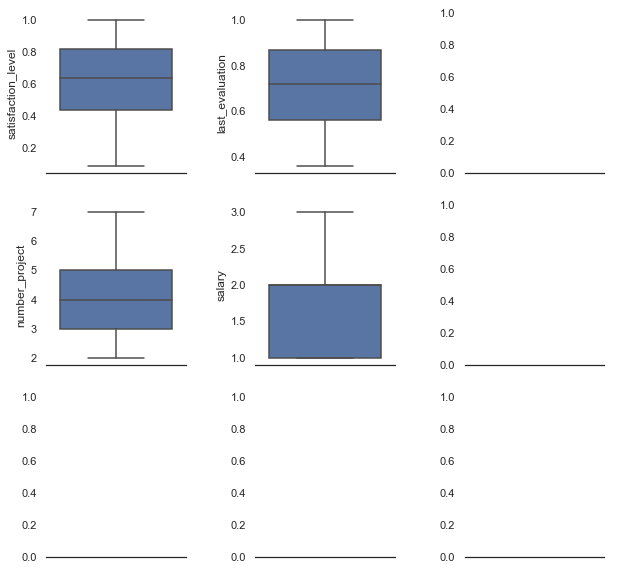

In [46]:
f, axes=plt.subplots(3,3, figsize=(10,10) , sharex=True) 

plt.subplots_adjust(wspace=0.5)
                     
sns.despine(left=True)
                    
sns.boxplot( x= 'satisfaction_level', data=data, orient='v',ax=axes[0,0])
sns.boxplot( x ='last_evaluation' , data=data, orient='v' , ax =axes[0,1])
sns.boxplot(x='number_project',data=data, orient='v' , ax =axes[1,0])
sns.boxplot(x='salary',data=data, orient='v' , ax =axes[1,1])
              


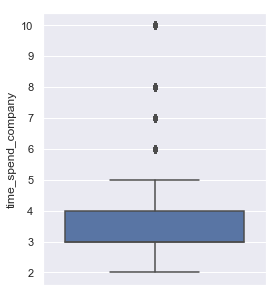

In [15]:
plt.figure(figsize=(4,5))
sns.boxplot( x= 'time_spend_company',  data=data, orient='v');

<h1>Correlation Analysis </h1>
The correlation is a very useful statitiscal analysis that describes the degree of relationship between two variables. Let´s see the table below and the heat map to see what relationship are in the data.

In the heat map is possible to see:

* Negative correlation of (-0.39) between satisfaction_level and the employees that left the company.<br>
* The highest positive correlation is between number of projects and average monthly hours (0.42).<br>
* Last_evaluation is high correlated to number_project(0.35)and average_monthly_hours(0.34).<br>
* Work_accident have a low negative correlation(-0.15)and salary (-0.16) with employees that left.

In [16]:
corr=data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


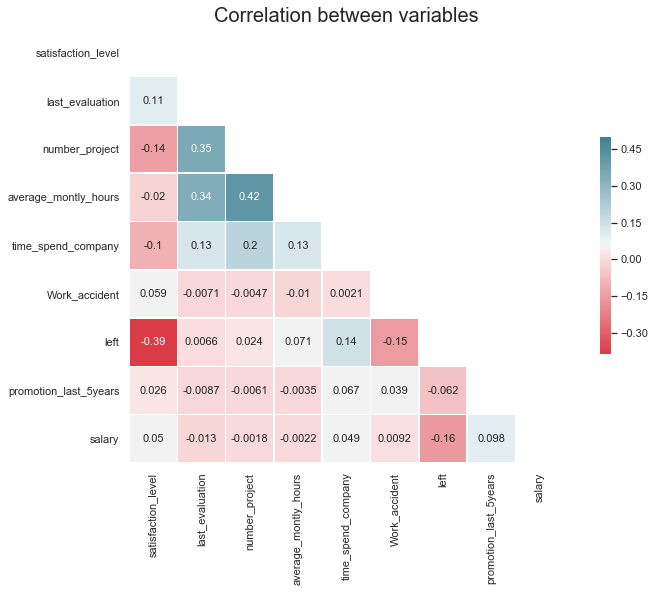

In [17]:
sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Inserir a figura
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Desenhar o heatmap com a máscara
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);

In [18]:
#hypothesis


# How many employees left the company?

print(data['left'].value_counts(),)
print(data['left'].value_counts()[1],"employees left the company")

0    11428
1     3571
Name: left, dtype: int64
3571 employees left the company


Text(0.5,1,'Stayed or Left')

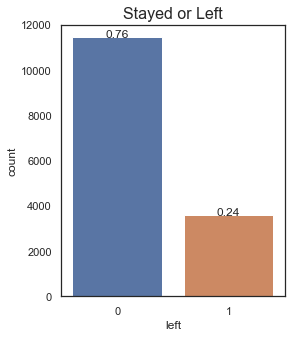

In [19]:
# the plot show the amount of employees that stayed and left the company.
plt.figure(figsize=(4,5))
ax=sns.countplot(data.left)
total=float(len(data))

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center"
           )
plt.title('Stayed or Left', fontsize=16)


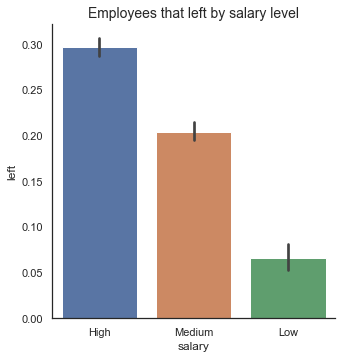

In [20]:
#First Hypothesis The first hypothesis is that salary is the reason why the employees left the company. Let's see if is this correct.
j = sns.factorplot(x='salary', y='left', kind='bar', data=data)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['High', 'Medium', 'Low']);

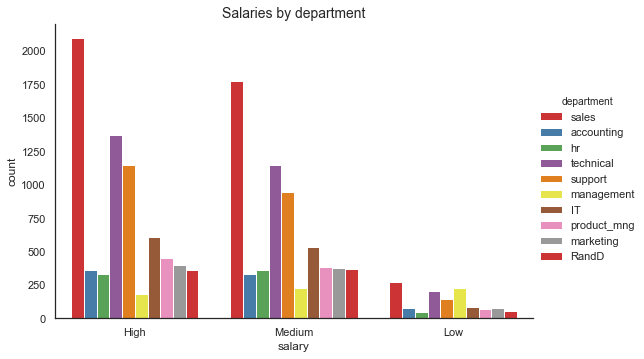

In [21]:
#In the graphic Salaries by department is possible to see the distribuition of the salaries by department.

h = sns.factorplot(x = 'salary', hue='department', kind ='count', size = 5,aspect=1.5, data=data, palette='Set1' )
plt.title("Salaries by department", fontsize=14)
h.set_xticklabels(['High', 'Medium', 'Low']);

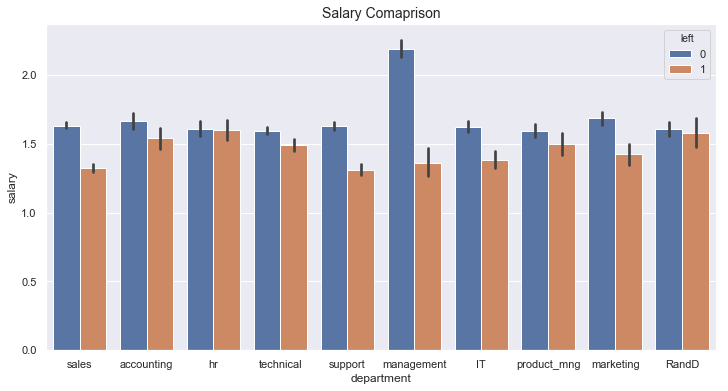

In [22]:
#The first hypothesis looks very weak to be the main reason why the employees left the company.
sns.set()
plt.figure(figsize=(12,6))
sns.barplot(x='department',y='salary',hue='left', data=data)
plt.title('Salary Comaprison', fontsize=14);

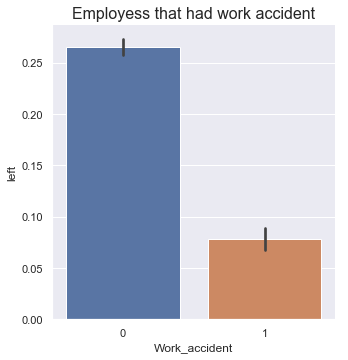

In [23]:
#second hypothesis 
#The second hypothesis is: employees leave the company because work is not safe.

sns.factorplot(x='Work_accident',y='left',kind='bar', data=data)
plt.title('Employess that had work accident',fontsize=16);


In [24]:
print(data.Work_accident.sum())
print(data.Work_accident.mean())
print((data[data['left']==1]['Work_accident']).sum())      

2169
0.1446096406427095
169


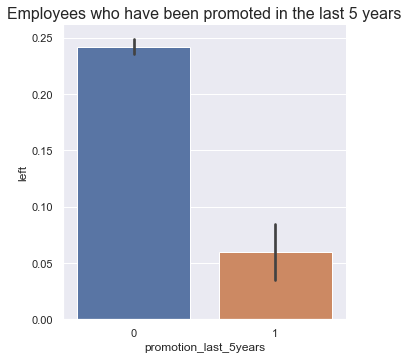

In [25]:
#third hypothesis
#Is this company a good place to grow professionally?
sns.factorplot(x='promotion_last_5years', y='left', kind='bar', data=data)
plt.title('Employees who have been promoted in the last 5 years', fontsize=16);


In [26]:
print(data.promotion_last_5years.sum())
print(data.promotion_last_5years.mean())



319
0.021268084538969265


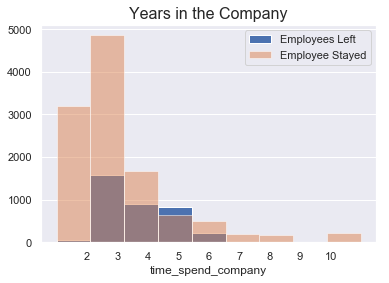

In [27]:
plt.figure()
bins=np.linspace(1.0 , 11, 10)
plt.hist(data[data['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left'
)
plt.hist(data[data['left']==0]['time_spend_company'], bins=bins, alpha = 0.5, label = 'Employee Stayed')

plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_company')
plt.title('Years in the Company',fontsize=16)
plt.legend(loc='best');

<h3>Performance Analysis</h3>
There are 2 distincts groups of employees. A group with poor performance and other with high performance employees. It's natural that employees that don't work well leave the company, but the main problem is that the high performance employees is leaving too and it's necessary to understand why.

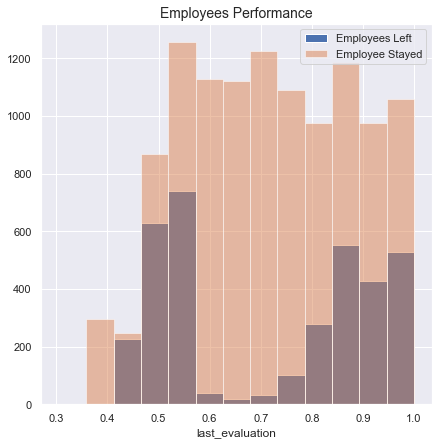

In [28]:
plt.figure(figsize =(7,7))
bins = np.linspace(0.305, 1.0001, 14)
plt.hist(data[data['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['last_evaluation'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Performance', fontsize=14)
plt.xlabel('last_evaluation')
plt.legend(loc='best');

poor_performance_left: 1531
poor_performance_stayed: 36


high_performance_left: 47
high_performance_stayed 889


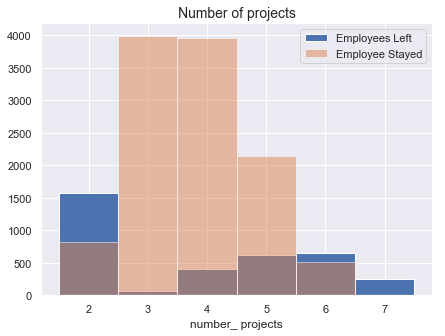

In [29]:
poor_performance_left = data[(data.last_evaluation <= 0.62) & (data.number_project == 2) & (data.left == 1)]
print('poor_performance_left:',len(poor_performance_left))

poor_performance_stayed = data[(data.last_evaluation > 0.62) & (data.number_project == 2) & (data.left == 1)]
print('poor_performance_stayed:',len(poor_performance_stayed))

print('\n')

high_performance_left= data[(data.last_evaluation <= 0.62) & (data.number_project >=5) & (data.left == 1)]
high_performance_stayed= data[(data.last_evaluation > 0.8) & (data.number_project >=5) & (data.left == 0)]
print('high_performance_left:',len(high_performance_left))
print('high_performance_stayed', len(high_performance_stayed))

plt.figure(figsize =(7,5))
bins = np.linspace(1.5,7.5, 7)
plt.hist(data[data['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['number_project'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Number of projects', fontsize=14)
plt.xlabel('number_ projects')
plt.legend(loc='best');

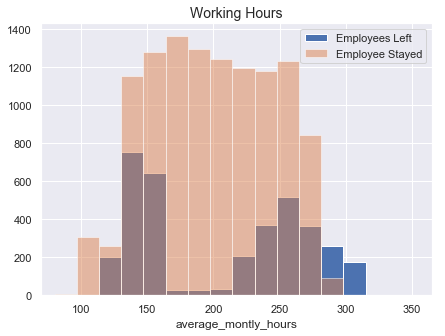

In [30]:
plt.figure(figsize =(7,5))
bins = np.linspace(80,315, 15)
plt.hist(data[data['left']==1]['average_montly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['average_montly_hours'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Working Hours', fontsize=14)
plt.xlabel('average_montly_hours')
plt.xlim((70,365))
plt.legend(loc='best');

number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64


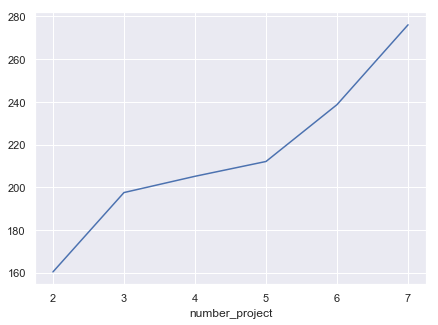

In [31]:
groupby_number_projects = data.groupby('number_project').mean()
groupby_number_projects = groupby_number_projects['average_montly_hours']
print(groupby_number_projects)
plt.figure(figsize=(7,5))
groupby_number_projects.plot();

In [32]:


work_less_hours_left = data[(data.average_montly_hours < 200) & (data.number_project == 2) & (data.left == 1)]
print('work_less_hours_left:',len(work_less_hours_left))

work_more_hours_left = data[(data.average_montly_hours > 240) & (data.number_project >=5 ) & (data.left == 1)]
print('work_more_hours_left:',len(work_more_hours_left))

work_less_hours_left: 1535
work_more_hours_left: 1225


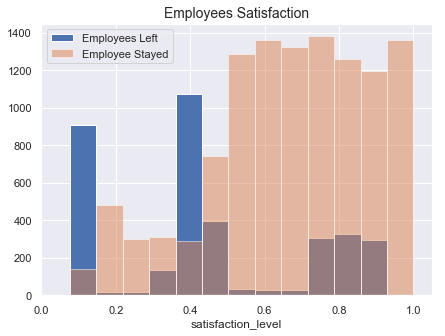

In [33]:
plt.figure(figsize =(7,5))
bins = np.linspace(0.006,1.000, 15)
plt.hist(data[data['left']==1]['satisfaction_level'], bins=bins, alpha=1, label='Employees Left')
plt.hist(data[data['left']==0]['satisfaction_level'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Satisfaction', fontsize=14)
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

In [34]:
groupby_time_spend = data.groupby('time_spend_company').mean()
groupby_time_spend['satisfaction_level']



time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

<b><h3>When the employees becames unsatisfayed? <br> </b> </h3>
In next results it is clear the drop in satisfaction when employees are working on 6 or more projects.

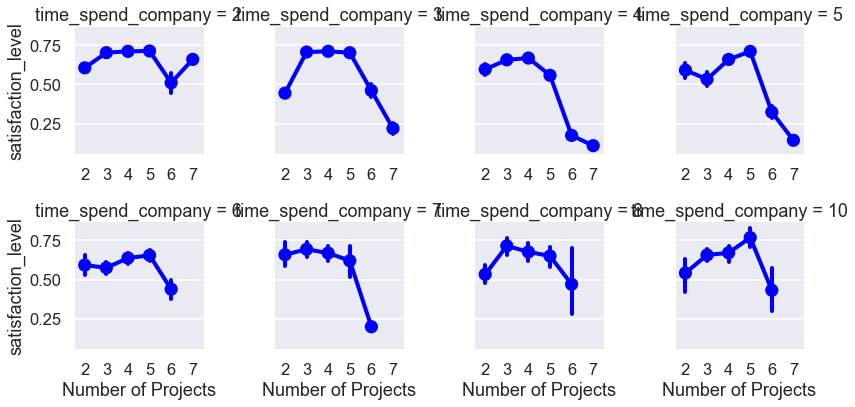

In [35]:
sns.set()
sns.set_context("talk")
ax = sns.factorplot(x="number_project", y="satisfaction_level", col="time_spend_company",col_wrap=4, size=3, color='blue',sharex=False, data=data)
ax.set_xlabels('Number of Projects');

<h3><b>From the employees that left with high performance, 4 or more years in the company and working on 5 or more project had:</b></h3>

* Low satisfaction level,
* Worked more hours
* Haven´t been promoted in the last five years.

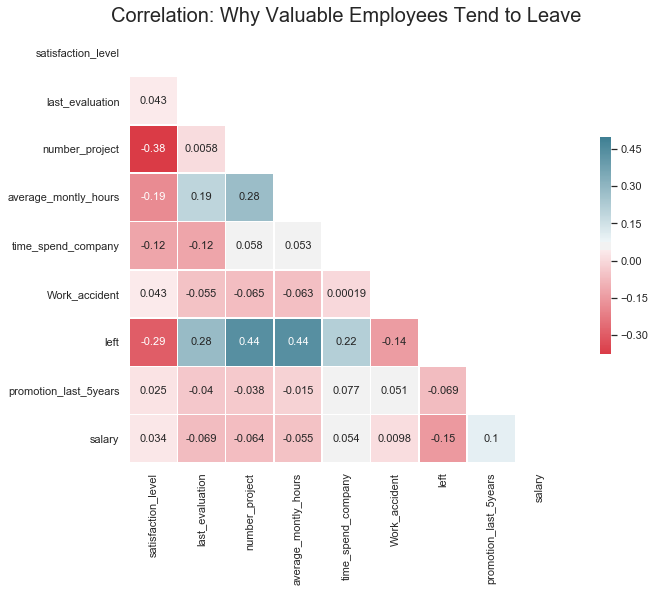

In [36]:
func_living = data[(data.last_evaluation >= 0.70) | (data.time_spend_company >=4) | (data.number_project >= 5)]

corr2 = func_living.corr()

sns.set(style='white')

mask = np.zeros_like(corr2, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Insert the graphic
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Draw heat map mask
ax = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation: Why Valuable Employees Tend to Leave', fontsize=20);

<b>So we can now see the problem with highly evaluated employees who leave. <br>
1. They have lower satisfaction level<br>
2. They have more number of projects
3. They have higher monthly hours
4. They have also spent more time in company
5. They have lower salary
6. They have not been promoted in the last 5 years </b>

<h1> Feature engineering 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt

In [38]:
index = data.index
columns = data.columns
values = data.values
print(columns)

y=data['left']

x=data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']]


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


In [39]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

print('Shape of x:',x.shape,' Shape of y:', y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
print('Shape of x:',x_train.shape,' Shape of y:', y_train.shape)

Shape of x: (14999, 8)  Shape of y: (14999,)
Shape of x: (11249, 8)  Shape of y: (11249,)


[1 0 0 ... 1 0 0]
Confusion Matrix :
[[2750  131]
 [  70  799]]
report              precision    recall  f1-score   support

          0       0.98      0.95      0.96      2881
          1       0.86      0.92      0.89       869

avg / total       0.95      0.95      0.95      3750

Accuracy 0.9464


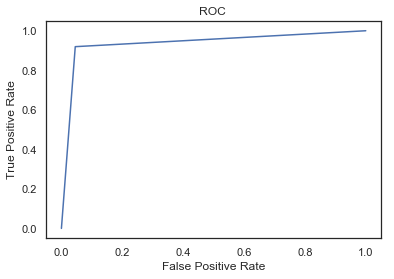

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(y_pred)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print('report',classification_report(y_test,y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))

fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ')
plt.show()

[1 0 0 ... 0 0 0]
Confusion Matrix :
[[2865   16]
 [ 327  542]]
report              precision    recall  f1-score   support

          0       0.90      0.99      0.94      2881
          1       0.97      0.62      0.76       869

avg / total       0.91      0.91      0.90      3750

Accuracy 0.9085333333333333


C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


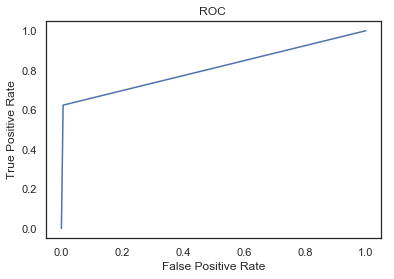

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(y_pred)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print('report',classification_report(y_test,y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))

fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ')
plt.show()

[1 0 0 ... 1 0 0]
Confusion Matrix :
[[2837   44]
 [  25  844]]
report              precision    recall  f1-score   support

          0       0.99      0.98      0.99      2881
          1       0.95      0.97      0.96       869

avg / total       0.98      0.98      0.98      3750

Accuracy 0.9816


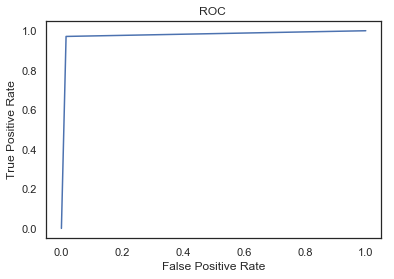

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(y_pred)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print('report',classification_report(y_test,y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))

fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ')
plt.show()

[1 0 0 ... 1 0 0]
Confusion Matrix :
[[2850   31]
 [  54  815]]
report              precision    recall  f1-score   support

          0       0.98      0.99      0.99      2881
          1       0.96      0.94      0.95       869

avg / total       0.98      0.98      0.98      3750

Accuracy 0.9773333333333334


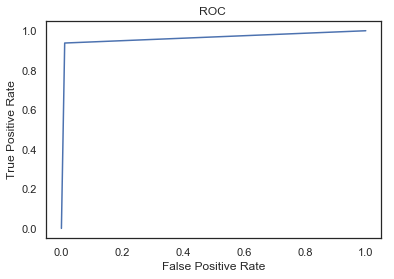

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(y_pred)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print('report',classification_report(y_test,y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))

fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ')
plt.show()

[1 0 0 ... 1 0 0]
Confusion Matrix :
[[2799   82]
 [  69  800]]
report              precision    recall  f1-score   support

          0       0.98      0.97      0.97      2881
          1       0.91      0.92      0.91       869

avg / total       0.96      0.96      0.96      3750

Accuracy 0.9597333333333333


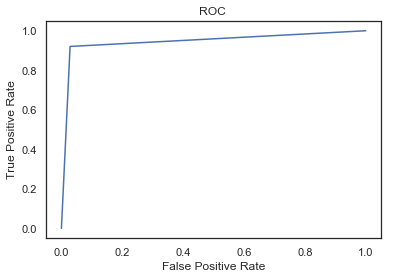

In [44]:
#SVM CLASSIFIER

from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train )
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False)
y_pred=clf.predict(x_test)
print(y_pred)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print('report',classification_report(y_test,y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))

fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ')
plt.show()

[1 0 0 ... 1 1 0]
Confusion Matrix :
[[2842   39]
 [  37  832]]
report              precision    recall  f1-score   support

          0       0.99      0.99      0.99      2881
          1       0.96      0.96      0.96       869

avg / total       0.98      0.98      0.98      3750

Accuracy 0.9797333333333333


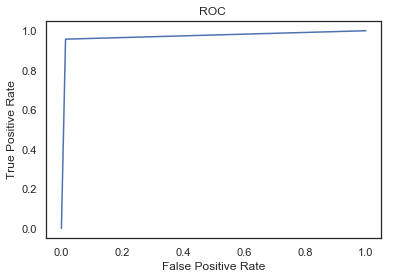

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=1000, learning_rate=0.2)
ada.fit(x_train, y_train)
y_pred=ada.predict(x_test)
print(y_pred)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print('report',classification_report(y_test,y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))

fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ')
plt.show()